In [28]:
%run 'HelperFunctions.ipynb'
%run 'Data Preprocessing.ipynb'

In [ ]:
# !pip install --upgrade scipy

In [33]:
merged_df = df_energy_3.join(df_env_3['CO2'])

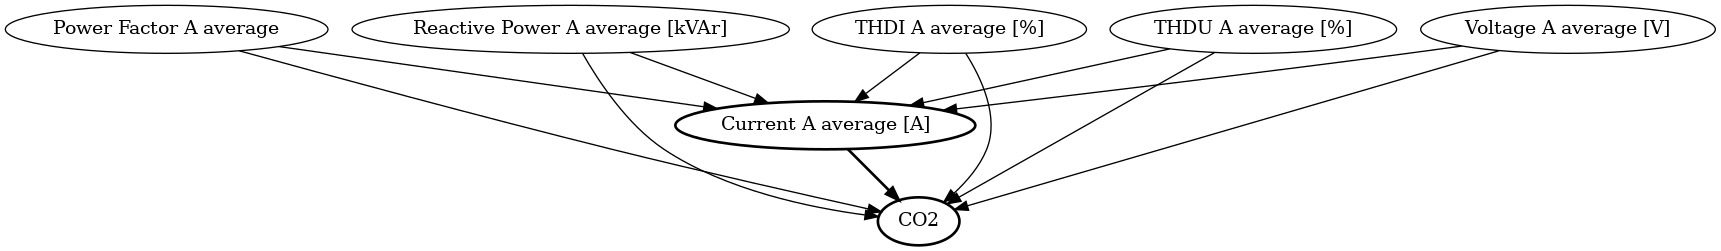

In [48]:
import networkx as nx
import pygraphviz as pgv
from IPython.display import Image

# Konvertujte CausalGraph u networkx graf
nx_graph = model._graph._graph

# Eksportujte networkx graf u dot format
dot_graph = nx.drawing.nx_pydot.to_pydot(nx_graph).to_string()

# Koristite pygraphviz da biste nacrtali graf
A = pgv.AGraph(string=dot_graph)
A.layout(prog="dot")
A.draw("causal_graph.png")

# Prikazivanje grafa
Image(filename="causal_graph.png")

<h1>From official documentation</h1>

<h2>Effect inference</h2>

In [15]:
from dowhy import CausalModel
import dowhy.datasets

# Generate some sample data
data = dowhy.datasets.linear_dataset(
    beta=10,
    num_common_causes=5,
    num_instruments=2,
    num_samples=10000)

# Step 1: Create a causal model from the data and given graph.
model = CausalModel(
    data=data["df"],
    treatment=data["treatment_name"],
    outcome=data["outcome_name"],
    graph=data["gml_graph"])

# Step 2: Identify causal effect and return target estimands
identified_estimand = model.identify_effect()

# Step 3: Estimate the target estimand using a statistical method.
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_matching")

# Step 4: Refute the obtained estimate using multiple robustness checks.
refute_results = model.refute_estimate(identified_estimand, estimate,
                                       method_name="random_common_cause")

<h2>Graphical causal model-based inference</h2>

In [18]:
import networkx as nx, numpy as np, pandas as pd
from dowhy import gcm

# Let's generate some "normal" data we assume we're given from our problem domain:
X = np.random.normal(loc=0, scale=1, size=1000)
Y = 2 * X + np.random.normal(loc=0, scale=1, size=1000)
Z = 3 * Y + np.random.normal(loc=0, scale=1, size=1000)
data = pd.DataFrame(dict(X=X, Y=Y, Z=Z))

# Step 1: Model our system:
causal_model = gcm.StructuralCausalModel(nx.DiGraph([('X', 'Y'), ('Y', 'Z')]))
gcm.auto.assign_causal_mechanisms(causal_model, data)

# Step 2: Train our causal model with the data from above:
gcm.fit(causal_model, data)

# Step 3: Perform a causal analysis. E.g. we have an:
anomalous_record = pd.DataFrame(dict(X=[.7], Y=[100.0], Z=[303.0]))
# ... and would like to answer the question:
# "Which node is the root cause of the anomaly in Z?":
anomaly_attribution = gcm.attribute_anomalies(causal_model, "Z", anomalous_record)

Fitting causal mechanism of node Z: 100%|██████████| 3/3 [00:00<00:00, 48.02it/s]
Evaluate set function: 8it [00:00, 634.91it/s]


<h2>Conditional Average Treatment Effects (CATE) with DoWhy and EconML</h2>

In [19]:
%load_ext autoreload
%autoreload 2

In [20]:
import numpy as np
import pandas as pd
import logging

import dowhy
from dowhy import CausalModel
import dowhy.datasets

import econml
import warnings
warnings.filterwarnings('ignore')

BETA = 10

In [21]:
data = dowhy.datasets.linear_dataset(BETA, num_common_causes=4, num_samples=10000,
                                    num_instruments=2, num_effect_modifiers=2,
                                     num_treatments=1,
                                    treatment_is_binary=False,
                                    num_discrete_common_causes=2,
                                    num_discrete_effect_modifiers=0,
                                    one_hot_encode=False)
df=data['df']
print(df.head())
print("True causal estimate is", data["ate"])

         X0        X1   Z0        Z1        W0        W1 W2 W3         v0  \
0  0.909232 -0.145054  1.0  0.150432  2.311736  0.626797  2  0  26.888891   
1  1.478727 -0.181799  1.0  0.899752  0.448684  0.178636  1  2  29.996791   
2 -0.217955  0.472392  0.0  0.974972  0.379291  1.911845  2  3  29.092973   
3  1.215588 -1.094830  0.0  0.512549  0.622643  0.766061  1  0  12.520508   
4  0.177751 -0.121583  0.0  0.105591  1.779096  1.624167  0  1  14.660959   

            y  
0  360.096065  
1  458.537354  
2  348.228968  
3  130.504617  
4  167.221367  
True causal estimate is 9.51148793870983


In [22]:
model = CausalModel(data=data["df"],
                    treatment=data["treatment_name"], outcome=data["outcome_name"],
                    graph=data["gml_graph"])

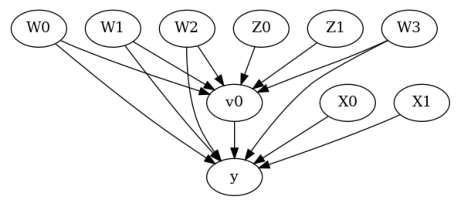

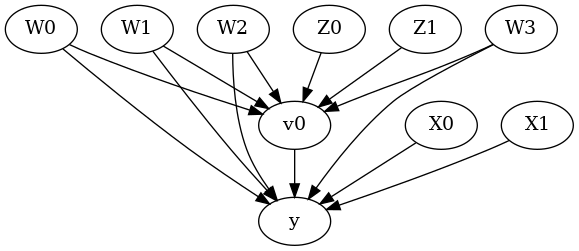

In [26]:
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))